<a href="https://colab.research.google.com/github/codm12112/SIT-PROJECT/blob/main/Updated_HousingDB_post2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("/content/HousingDB_post2010.csv", engine='python')


In [6]:
print("Original Data Info:")
print(df.info())
print("\nOriginal Data Shape:", df.shape)

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76538 entries, 0 to 76537
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Job_Number  76538 non-null  object 
 1   Job_Type    76538 non-null  object 
 2   ResidFlag   76538 non-null  object 
 3   NonresFlag  10725 non-null  object 
 4   Job_Status  76538 non-null  object 
 5   CompltYear  61832 non-null  float64
 6   PermitYear  70161 non-null  float64
 7   ClassAInit  76537 non-null  float64
 8   ClassAProp  76538 non-null  int64  
 9   ClassANet   76401 non-null  float64
 10  HotelInit   31112 non-null  float64
 11  HotelProp   15757 non-null  float64
 12  OtherBInit  31175 non-null  float64
 13  OtherBProp  15761 non-null  float64
 14  Units_CO    51594 non-null  float64
 15  Boro        76538 non-null  int64  
 16  BIN         76538 non-null  int64  
 17  BBL         76538 non-null  int64  
 18  AddressNum  76538 non-null  object 
 19  Addre

In [7]:
# Define columns to be removed
columns_to_drop = ['Latitude', 'Longitude', 'GeomSource', 'Version']
df_cleaned = df.drop(columns=columns_to_drop)


In [8]:
print("\n--- Data Cleaning Complete ---")
print("New Data Shape:", df_cleaned.shape)
print("Columns after cleaning:", df_cleaned.columns.tolist())


--- Data Cleaning Complete ---
New Data Shape: (76538, 59)
Columns after cleaning: ['Job_Number', 'Job_Type', 'ResidFlag', 'NonresFlag', 'Job_Status', 'CompltYear', 'PermitYear', 'ClassAInit', 'ClassAProp', 'ClassANet', 'HotelInit', 'HotelProp', 'OtherBInit', 'OtherBProp', 'Units_CO', 'Boro', 'BIN', 'BBL', 'AddressNum', 'AddressSt', 'Occ_Init', 'Occ_Prop', 'Bldg_Class', 'Job_Desc', 'DateFiled', 'DatePermit', 'DateLstUpd', 'DateComplt', 'ZoningDst1', 'ZoningDst2', 'ZoningDst3', 'SpeclDst1', 'SpeclDst2', 'Landmark', 'FloorsInit', 'FloorsProp', 'Enlargemnt', 'Ownership', 'CenBlock20', 'CenTract20', 'BCTCB2020', 'BCT2020', 'NTA2020', 'NTAName20', 'CDTA2020', 'CDTAName20', 'CommntyDst', 'CouncilDst', 'SchSubDist', 'SchCommnty', 'SchElmntry', 'SchMiddle', 'FireCmpany', 'FireBattln', 'FireDivsn', 'PolicePcnt', 'PL_FIRM07', 'PL_PFIRM15', 'DCPEdited']


In [27]:
df_cleaned.to_csv("Cleaned_HousingDB.csv", index=False)


/tmp/ipython-input-1681325051.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1681325051.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1681325051.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1681325051.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




IndexError: index 2 is out of bounds for axis 1 with size 2

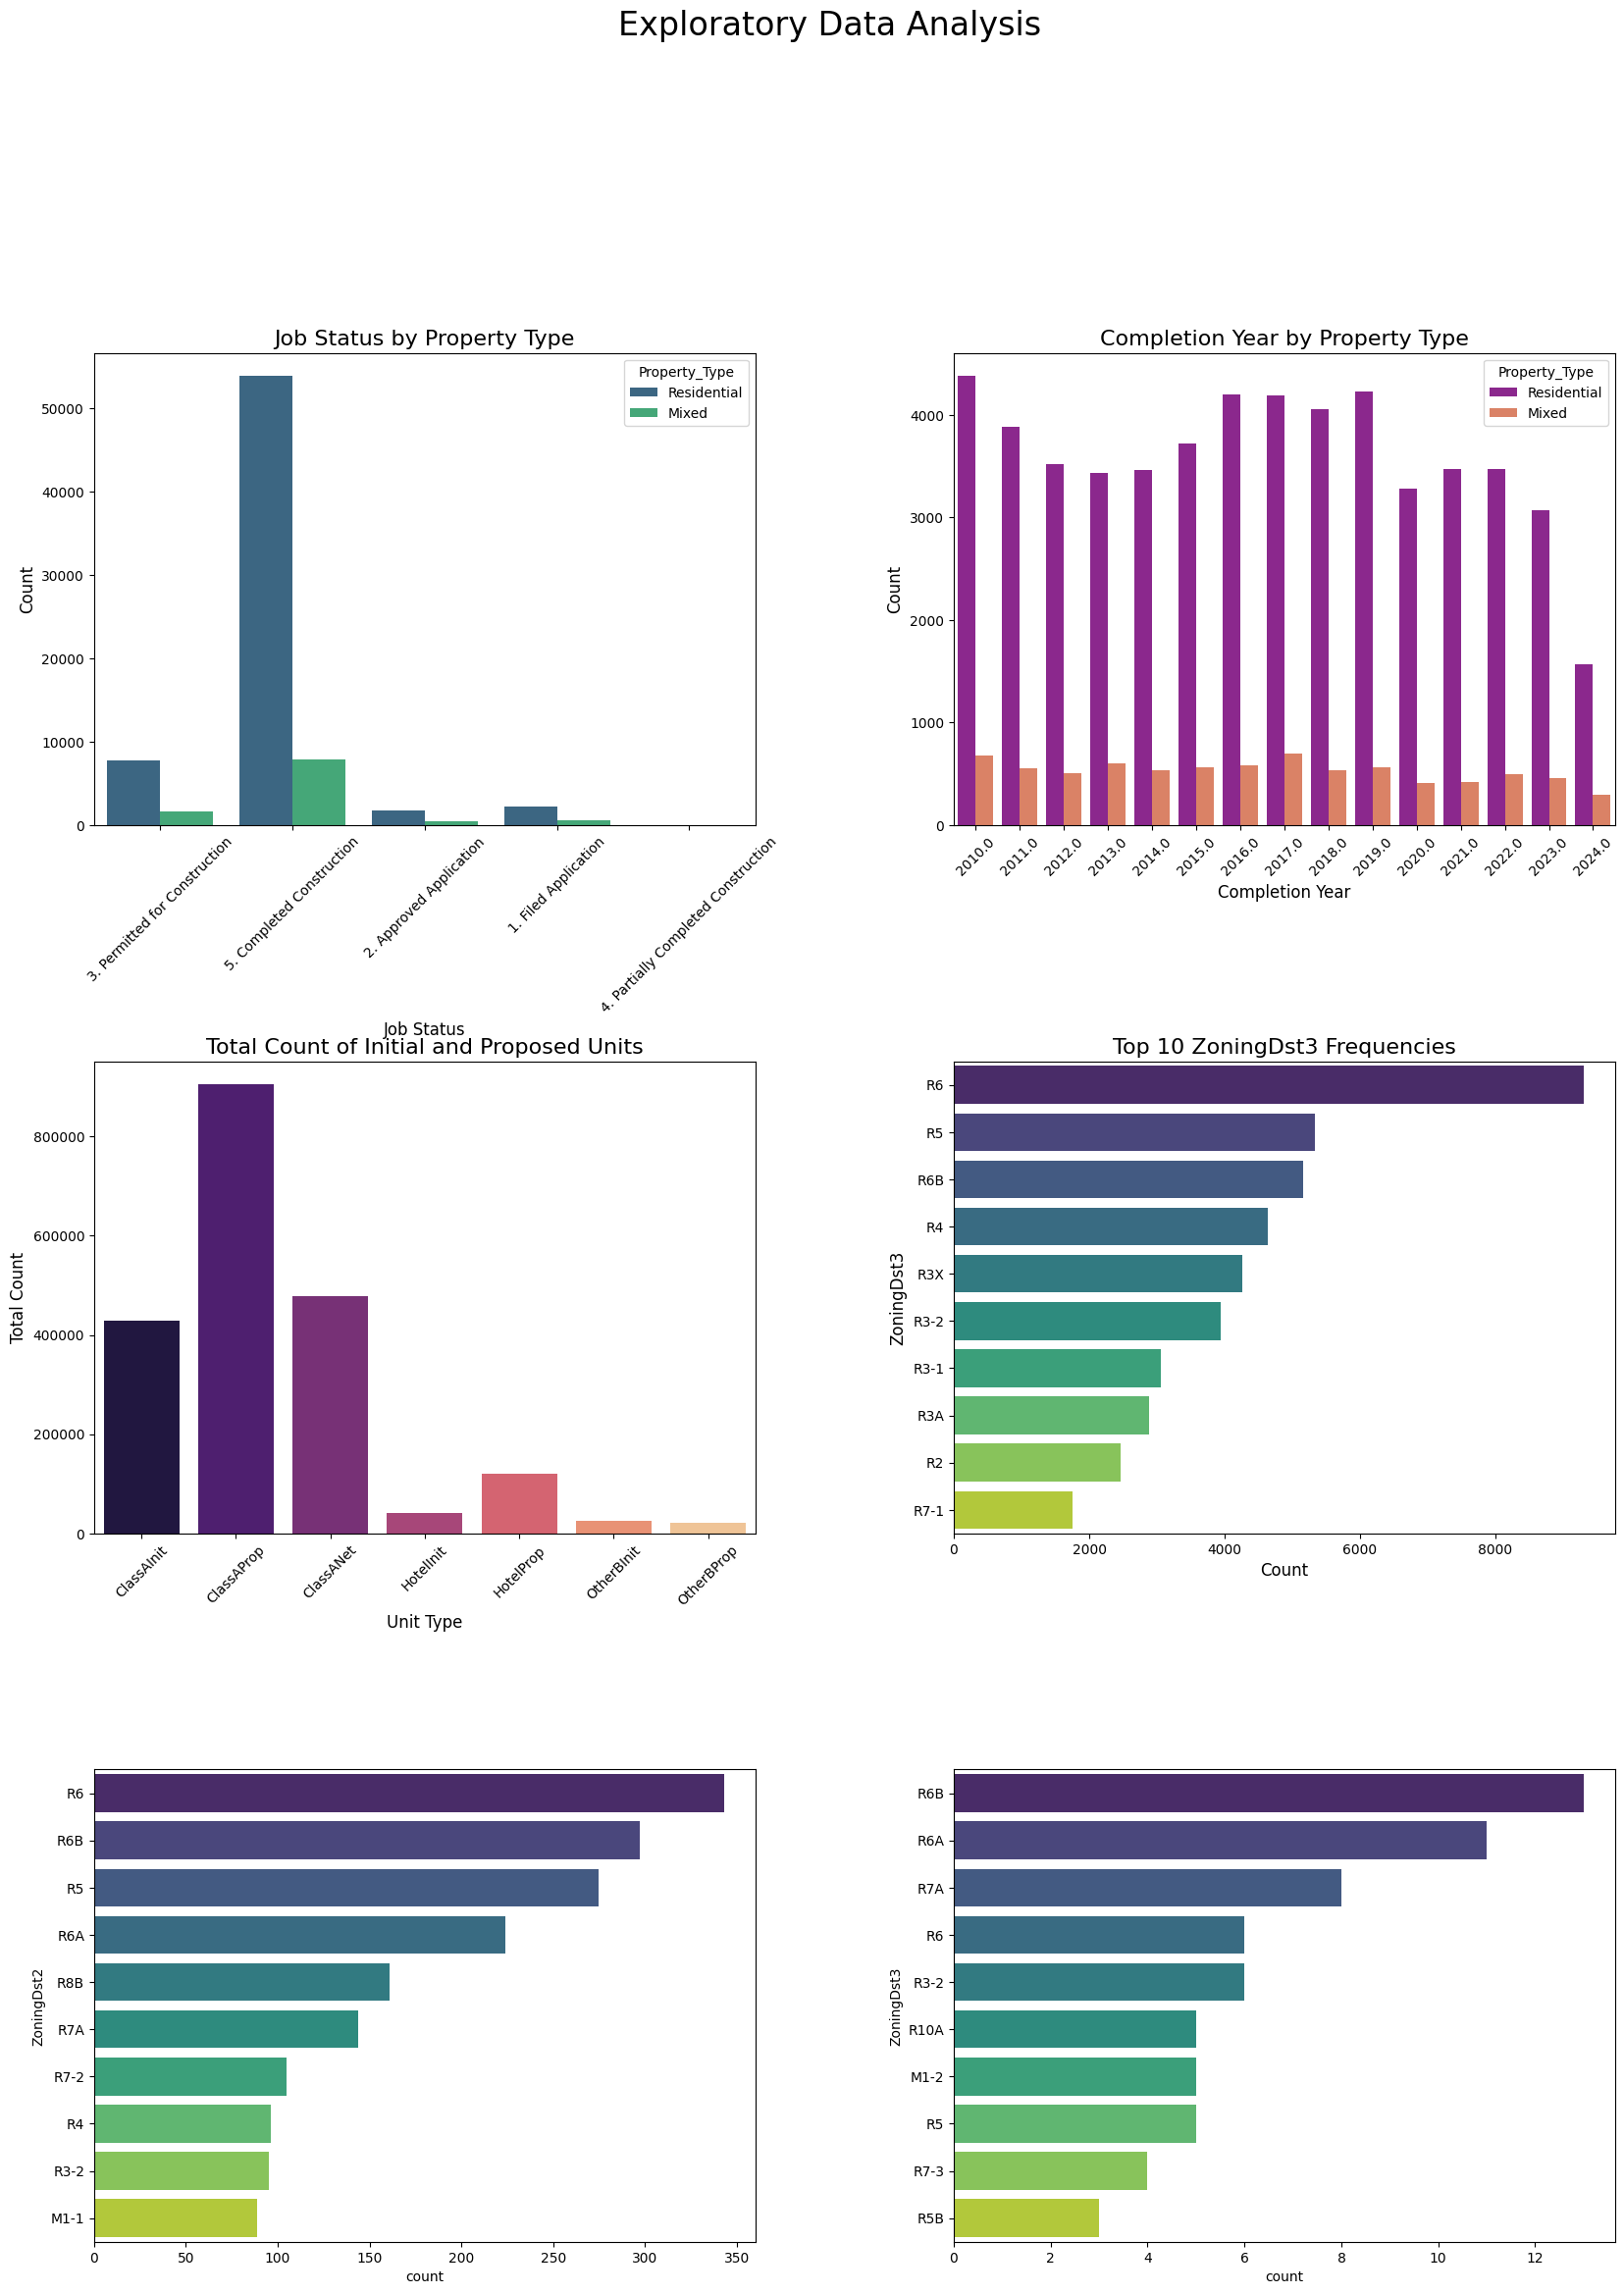

In [26]:
# Create a new 'Property_Type' column for the clustered bar chart
def get_property_type(row):
    if pd.notna(row['ResidFlag']) and pd.notna(row['NonresFlag']):
        return 'Mixed'
    elif pd.notna(row['ResidFlag']):
        return 'Residential'
    elif pd.notna(row['NonresFlag']):
        return 'Non-Residential'
    return 'Other'

df_cleaned['Property_Type'] = df_cleaned.apply(get_property_type, axis=1)

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))
fig.suptitle('Exploratory Data Analysis', fontsize=24, y=1.02)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# EDA 1: Clustered Bar Chart for Job Status by Property Type
sns.countplot(data=df_cleaned, x='Job_Status', hue='Property_Type', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Job Status by Property Type', fontsize=16)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel('Job Status', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# EDA 2: Clustered Bar Chart for Completion Year by Property Type
sns.countplot(data=df_cleaned, x='CompltYear', hue='Property_Type', ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Completion Year by Property Type', fontsize=16)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xlabel('Completion Year', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# EDA 3: Bar charts for various unit types
unit_columns = ['ClassAInit', 'ClassAProp', 'ClassANet', 'HotelInit', 'HotelProp', 'OtherBInit', 'OtherBProp']
df_units_sum = df_cleaned[unit_columns].sum().reset_index()
df_units_sum.columns = ['Unit Type', 'Total Count']
sns.barplot(data=df_units_sum, x='Unit Type', y='Total Count', ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Total Count of Initial and Proposed Units', fontsize=16)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel('Unit Type', fontsize=12)
axes[1, 0].set_ylabel('Total Count', fontsize=12)

# EDA 4: Bar charts for Zoning Districts
zoning_columns = ['ZoningDst1', 'ZoningDst2', 'ZoningDst3', 'SpeclDst1', 'SpeclDst2']
for i, col in enumerate(zoning_columns):
    sns.countplot(data=df_cleaned, y=col, ax=axes[1, 1] if i == 0 else axes[2, i-1], order=df_cleaned[col].value_counts().index[:10], palette='viridis')
    axes[1, 1].set_title(f'Top 10 {col} Frequencies', fontsize=16)
    axes[1, 1].set_xlabel('Count', fontsize=12)
    axes[1, 1].set_ylabel(col, fontsize=12)

# Remove any empty subplots
if len(zoning_columns) < 5:
    for i in range(len(zoning_columns), 5):
        axes[2, i-1].remove()

plt.tight_layout()
plt.show()


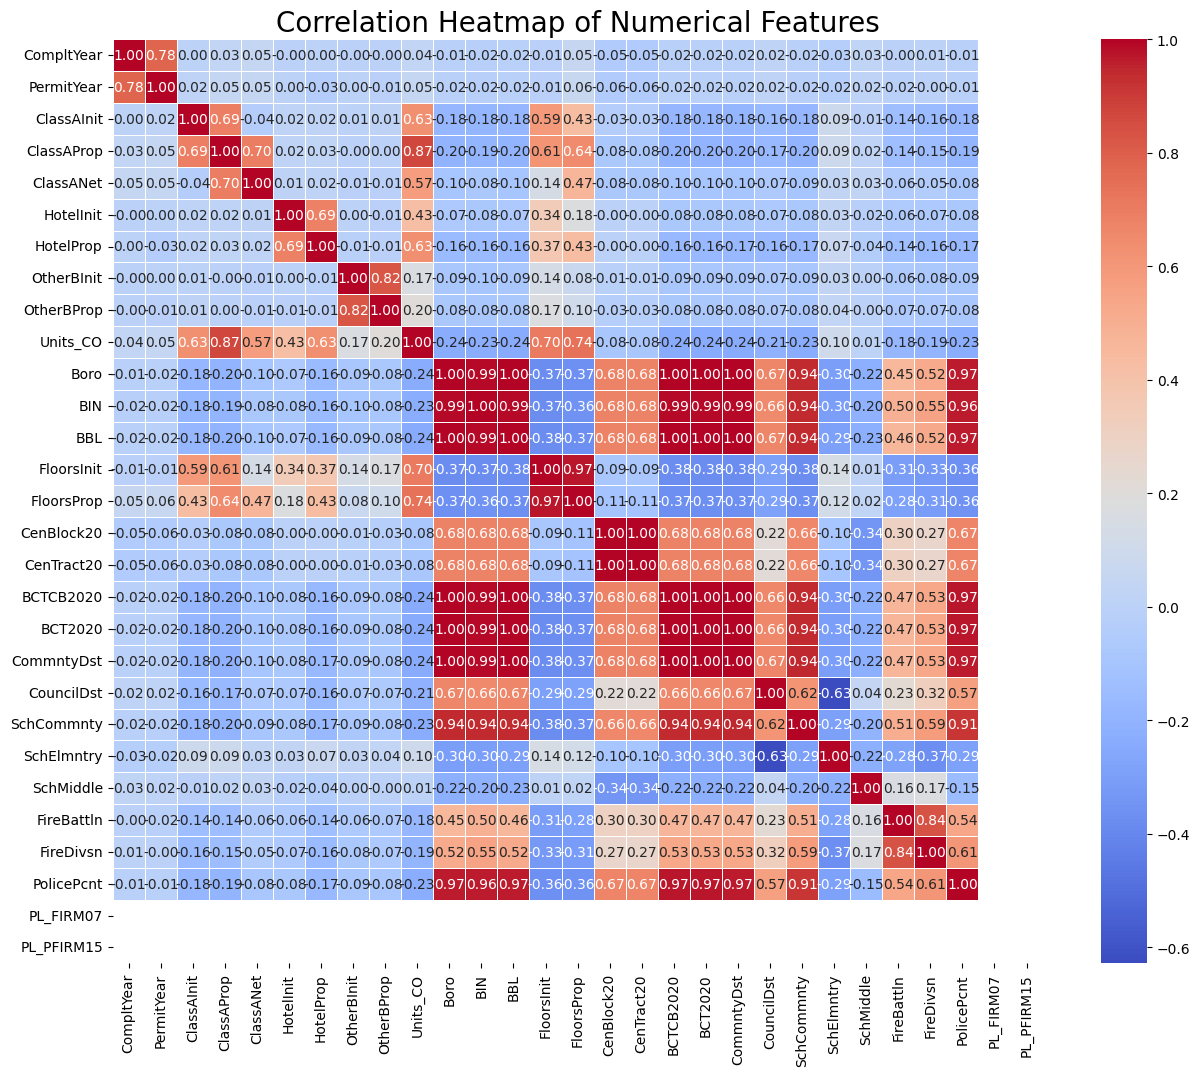

In [19]:
# Select all numerical columns to calculate the correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns.tolist()
correlation_matrix = df_cleaned[numeric_cols].corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=20)
plt.show()


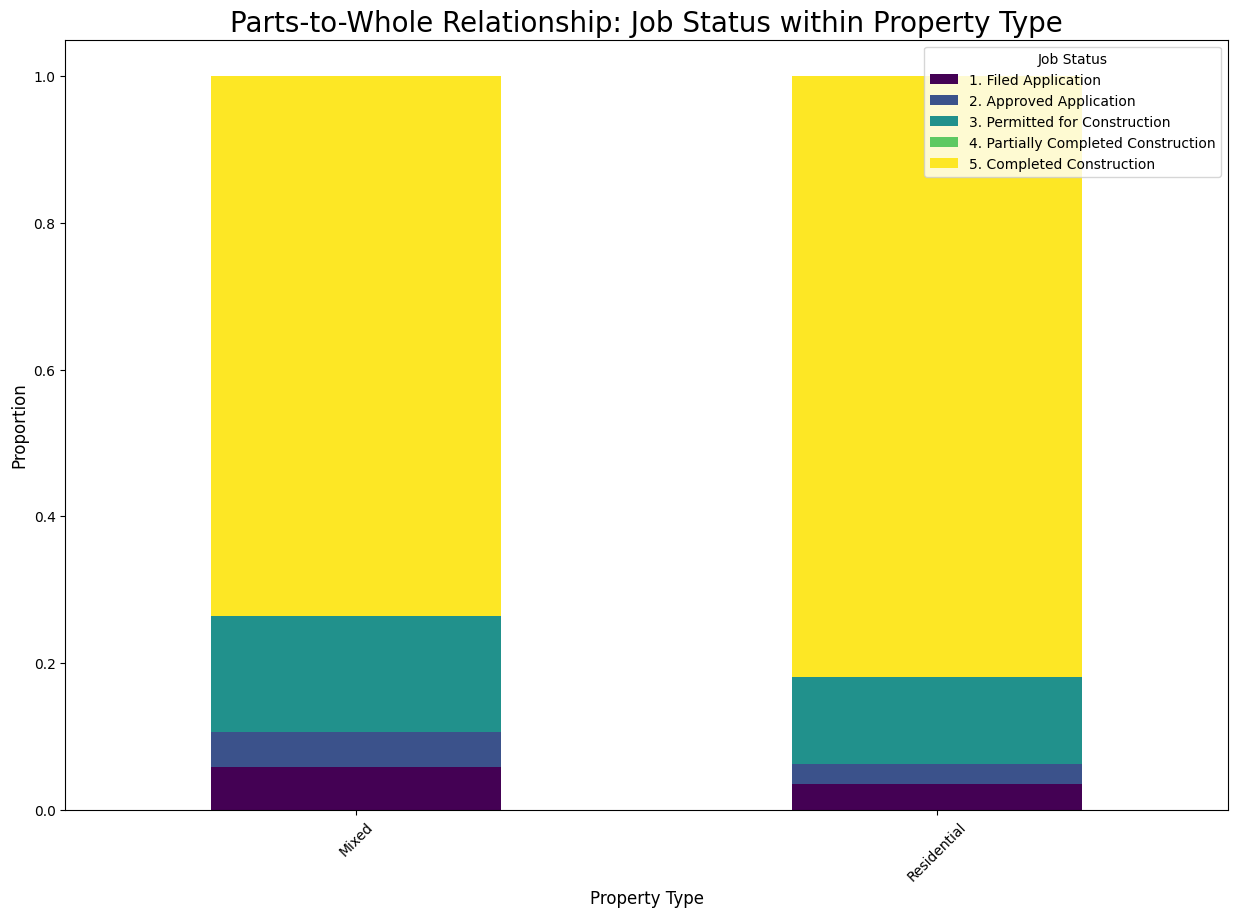

In [21]:
cross_tab = pd.crosstab(df_cleaned['Property_Type'], df_cleaned['Job_Status'])

# Normalize the data to show proportions (parts-to-whole)
cross_tab_norm = cross_tab.div(cross_tab.sum(1).astype(float), axis=0)

# Plot the stacked bar chart
ax = cross_tab_norm.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title('Parts-to-Whole Relationship: Job Status within Property Type', fontsize=20)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Job Status')
plt.show()


In [25]:
import plotly.express as px
df_sunburst = df_cleaned.groupby(['Property_Type', 'Job_Status']).size().reset_index(name='count')

# Create the Sunburst chart using plotly.express
fig_sunburst = px.sunburst(df_sunburst,
                           path=['Property_Type', 'Job_Status'],
                           values='count',
                           title='Parts-to-Whole Relationship: Job Status within Property Type',
                           color_continuous_scale=px.colors.sequential.Viridis,
                           height=700)
fig_sunburst.show()
